# Convouliutonal Neural Network (CNN)

In this part, created a Convolutional Neural Network (CNN) that is able to detect various objects in images. The Deep Learning model was implemented to recognize a cat or a dog in a set of pictures. However, this model can be reused to detect anything else - by simply changing the pictures in the input folder. 

For example, you will be able to train the same model on a set of brain images, to detect if they contain a tumor or not. But if you want to keep it fitted to cats and dogs, then you will literally be able to a take a picture of your cat or your dog, and your model will predict which pet you have.It was tested as well on some random image downloaded from google.

## Part 1 Building the CNN

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Part 2 - Fitting the CNN to the images

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Image Preoprocessing required as keras is expecting the output in specific format
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
8000/8000 [==============================] - 1728s 216ms/step - loss: 0.3601 - acc: 0.8309 - val_loss: 0.5903 - val_acc: 0.7934
Epoch 2/25
8000/8000 [==============================] - 1664s 208ms/step - loss: 0.1002 - acc: 0.9625 - val_loss: 0.8855 - val_acc: 0.7954
Epoch 3/25
8000/8000 [==============================] - 1665s 208ms/step - loss: 0.0501 - acc: 0.9822 - val_loss: 1.1056 - val_acc: 0.7854
Epoch 4/25
8000/8000 [==============================] - 1659s 207ms/step - loss: 0.0369 - acc: 0.9875 - val_loss: 1.1528 - val_acc: 0.8041
Epoch 5/25
8000/8000 [==============================] - 1632s 204ms/step - loss: 0.0301 - acc: 0.9897 - val_loss: 1.3565 - val_acc: 0.7982
Epoch 6/25
8000/8000 [==============================] - 1590s 199ms/step - loss: 0.0239 - acc: 0.9920 - val_loss: 1.3650 - val_acc: 0.7894
Epoch 7/25
8000/8000 [==============================] - 1519s 190ms/step - loss: 0

## Part 3 - Making new predictions

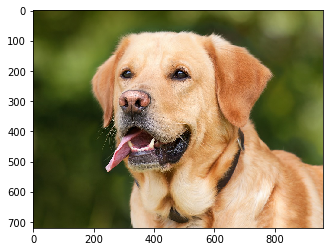

Our Prediction:  dog


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('dataset/single_prediction/cat_or_dog_1.jpg')
imgplot = plt.imshow(img)
plt.show()

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print('Our Prediction: ', prediction)

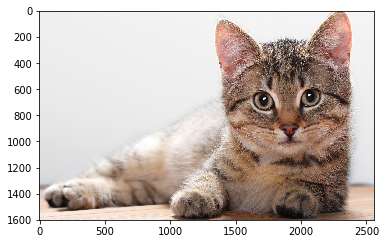

Our Prediction:  cat


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('dataset/single_prediction/cat_or_dog_2.jpg')
imgplot = plt.imshow(img)
plt.show()

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print('Our Prediction: ', prediction)